In [1]:
I = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
E = [
    ("1", "2"),
    ("2", "3"),
    ("3", "4"),
    ("3", "6"),
    ("3", "7"),
    ("4", "5"),
    ("6", "8"),
    ("7", "9"),
]

NODE_POS = {
    "1": [-2.0, 1.0],
    "2": [-1.0, 0.5],
    "3": [0.0, 0.0],
    "4": [-1.0, -0.5],
    "5": [-2.0, -1.0],
    "6": [1.0, 0.5],
    "7": [1.0, -0.5],
    "8": [2.0, 1.0],
    "9": [2.0, -1.0],
}

In [3]:
def server(node_names: list[str], edge_pairs: list[tuple[str, str]]) -> None:
    from logging import basicConfig, INFO

    basicConfig(level=INFO)

    from topolink import Graph

    graph = Graph(node_names, edge_pairs, address="localhost:5555")
    graph.deploy()


server(I, E)

INFO:root:Server running on localhost:5555
INFO:root:Node 1 registered with address 10.20.107.251:54947
INFO:root:Node 2 registered with address 10.20.107.251:55917
INFO:root:Node 3 registered with address 10.20.107.251:54857
INFO:root:Node 4 registered with address 10.20.107.251:55103
INFO:root:Node 6 registered with address 10.20.107.251:54225
INFO:root:Node 7 registered with address 10.20.107.251:54377
INFO:root:Node 9 registered with address 10.20.107.251:55349
INFO:root:Node 8 registered with address 10.20.107.251:55133
INFO:root:Node 5 registered with address 10.20.107.251:54287
INFO:root:All nodes registered. Server is now ready.
INFO:root:Sent neighbor addresses to all nodes.
INFO:root:Node 6 has unregistered.
INFO:root:Node 5 has unregistered.
INFO:root:Node 8 has unregistered.
INFO:root:Node 4 has unregistered.
INFO:root:Node 2 has unregistered.
INFO:root:Node 1 has unregistered.
INFO:root:Node 7 has unregistered.
INFO:root:Node 3 has unregistered.
INFO:root:Node 9 has unregi

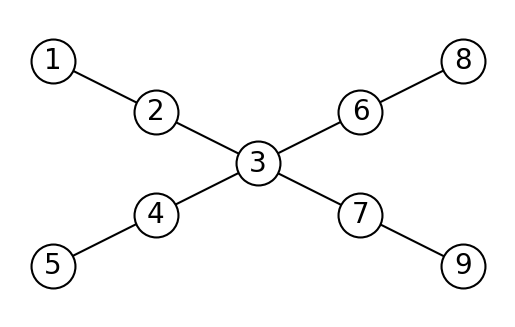

In [4]:
def draw_graph(
    node_names: list[str],
    edge_pairs: list[tuple[str, str]],
    node_pos: dict[str, list[float]],
) -> None:
    import matplotlib.pyplot as plt
    from topolink import Graph

    graph = Graph(node_names, edge_pairs, address="localhost:5555")

    fig, ax = plt.subplots()

    ax.set_aspect(1)
    ax.set_ylim(-1.5, 1.5)

    nx_options = {
        "with_labels": True,
        "font_size": 20,
        "node_color": "white",
        "node_size": 1000,
        "edgecolors": "black",
        "linewidths": 1.5,
        "width": 1.5,
        "pos": node_pos,
    }

    graph.draw(ax, **nx_options)

    plt.show()

    import os

    fig_dir = os.path.join(os.getcwd(), "figures")
    os.makedirs(fig_dir, exist_ok=True)

    fig_path = os.path.join(fig_dir, "fig_1.pdf")
    fig.savefig(fig_path, format="pdf", bbox_inches="tight")


draw_graph(I, E, NODE_POS)